In [3]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
base_plano_saude = pd.read_csv('Bases de dados/plano_saude.csv') #base de dados
base_plano_saude 

,idade,custo
0,18,871
1,23,1132
2,28,1242
3,33,1356
4,38,1488
5,43,1638
6,48,2130
7,53,2454
8,58,3066
9,63,4090


In [8]:
x_plano_saude = base_plano_saude.iloc[:,0].values #Cria uma variavel X que ira receber os valores de idade
x_plano_saude

array([18, 23, 28, 33, 38, 43, 48, 53, 58, 63])

In [10]:
y_plano_saude = base_plano_saude.iloc[:,1]#Cria uma variavel y(previsor) que ira receber os valores de custo
y_plano_saude

0     871
1    1132
2    1242
3    1356
4    1488
5    1638
6    2130
7    2454
8    3066
9    4090
Name: custo, dtype: int64

In [12]:
np.corrcoef(x_plano_saude,y_plano_saude)# Correlação entre as variaveis 

array([[1.        , 0.93091958],
       [0.93091958, 1.        ]])

In [13]:
x_plano_saude.shape #A variavel x possui uma unica dimensão, por isso é necessario transforma-la em ma matrix de
                    #de duas dimensões para ficar no formato de matriz

(10,)

In [17]:
x_plano_saude = x_plano_saude.reshape(-1,1) #Agora temos uma matrix
x_plano_saude.shape

(10, 1)

In [21]:
from sklearn.linear_model import LinearRegression #importando a biblioteca de regressão linear 
regressor_plano_saude = LinearRegression() # variavel recebe objeto 
regressor_plano_saude.fit(x_plano_saude,y_plano_saude) #Treinamento

LinearRegression()

In [27]:
#b0 - Intercept                  #b1 - Coeficiente angular
regressor_plano_saude.intercept_, regressor_plano_saude.coef_

(-558.9490909090912, array([61.86787879]))

In [29]:
previsoes = regressor_plano_saude.predict(x_plano_saude)
previsoes

array([ 554.67272727,  864.01212121, 1173.35151515, 1482.69090909,
       1792.03030303, 2101.36969697, 2410.70909091, 2720.04848485,
       3029.38787879, 3338.72727273])

In [32]:
x_plano_saude 

array([18, 23, 28, 33, 38, 43, 48, 53, 58, 63])

In [36]:
grafico = px.scatter(x = x_plano_saude.ravel(),y = y_plano_saude) # ravel reverte a matriz 2D para !D
grafico.add_scatter(x = x_plano_saude.ravel(),y = previsoes)
grafico.show()

In [42]:
regressor_plano_saude.predict([[40]]) #Testar um valor individualmente, atente para o uso de dois colchetes

array([1915.76606061])

In [44]:
regressor_plano_saude.score(x_plano_saude,y_plano_saude) # Indica a qualidade do algoritmo 

0.8666112727879174

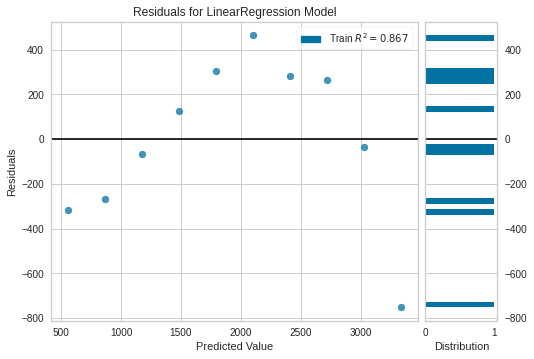

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [46]:
from yellowbrick.regressor import ResidualsPlot  #Grafido dos residuos
visualizador = ResidualsPlot(regressor_plano_saude)
visualizador.fit(x_plano_saude,y_plano_saude)
visualizador.poof()